# Sensitivity analysis of cross sections

## From resonnance parameters to WMP covariances

### Analytic sensitivites from complex contour integrals

#### A 1-level-1channel toy Problem

This program implements in Python 3 :
      - a toy-problem for conversion using the contour integral method
      - conversions for poles an residues
      - plots things

NOTE : author is Pablo DUCRU, for any inquires please e-mail at  *** p_ducru@mit.edu ***

In [25]:
## Import Python package for linear algebra
import numpy as np

In [27]:
## Importing Python packages for plotting
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter


Import local data and functions

In [3]:
from slbw import  evaluate_Σγ, dΣγ_dΓ, z_space_Σγ, analytic_Σγ, analytic_dΣγ_dΓ, multipole_Σ, multipole_dΣ_dΓ,  exact_poles_and_residues
from data import a_U238, ρ0_U238, ρ0, μ_E0_U238, μ_Γn_U238, μ_Γγ_U238, μ_Γ_U238, cov_Γ_U238 
from vector_fit import VF_algorithm, rational_function

## Nuclear Cross Section Model (SLBW for this benchmark)

#### Plotting the cross section

> This toy-problem consists of the 1st caputre cross section of U-238

In [28]:
# Energy grid structure
E_max = 10**6 # Minimum energy of the energy groups
E_min = 10**-4 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5 # Energy groups (here log-spaced) for flux ψ

# number densities (corrected to include the spin statistical factors)
N_densities = np.array([1,(0.124954)*1.0])

# scattering cross section
σ_nn = 0.166810

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


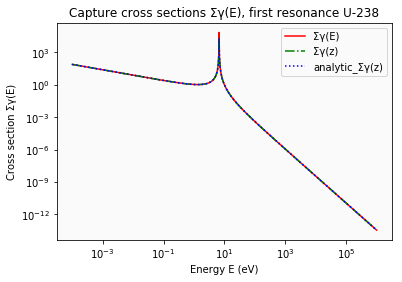

In [30]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], μ_Γ_U238) for g in range(E_g.size)]) , '-r', label='Σγ(E)') 
plt.loglog(z_g**2 , np.array([z_space_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-.g', label='Σγ(z)') 
plt.loglog(z_g**2 , np.array([analytic_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , ':b', label='analytic_Σγ(z)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

#### SLBW derivative equations

> We here validate the equations for the cross section derivatives with respect to resonance parameters $\frac{\partial \sigma_{n,\gamma}}{\partial \Gamma}(E)$

In [6]:
ε = 0.000001 
Γ_U238_ε_E0 = np.array([μ_E0_U238 + ε, μ_Γn_U238, μ_Γγ_U238])
Γ_U238_ε_Γn = np.array([μ_E0_U238 , μ_Γn_U238 + ε, μ_Γγ_U238])
Γ_U238_ε_Γγ = np.array([μ_E0_U238, μ_Γn_U238, μ_Γγ_U238 + ε])


In [7]:
E_max = 10**6 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5

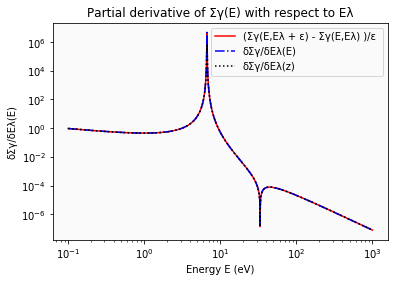

In [8]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5
## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_E0) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , ':k', label='δΣγ/δEλ(z)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

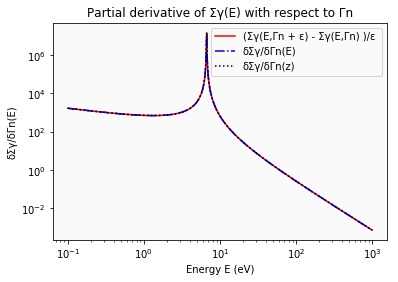

In [9]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γn'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γn) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γn + ε) - Σγ(E,Γn) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[1] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓn(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[1] for g in range(z_g.size)])) , ':k', label='δΣγ/δΓn(z)') 
plt.ylabel('δΣγ/δΓn(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

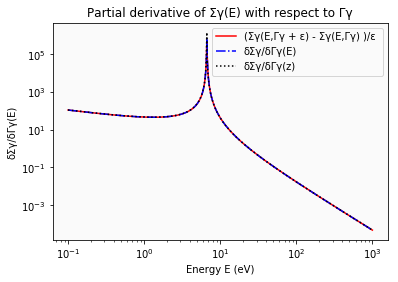

In [10]:
# Energy grid structure
E_max = 10**3 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 1000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ

## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Γγ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_Γγ) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Γγ + ε) - Σγ(E,Γγ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[2] for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓγ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[2] for g in range(z_g.size)])) , ':k', label='δΣγ/δΓγ(z)') 
plt.ylabel('δΣγ/δΓγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

> The latter tests show we have coded the derivatives in z-space correctly, (which can be continued to the entire complex plane, unlike the E-space ones because of the z = ±$\sqrt{E}$ mapping problem).

## Sensitivity v.s. Monte Carlo cross section uncertainty

> We here compare performing Monte Carlo from resonance parameters, to 1st-order sensitivity

#### Sampling from resonance parameters

In [11]:
def sample_Γ_res_parameters(mean_Γ_all, cov_Γ_all): ## This implementation cannot take cross-resonance covariance yet
    Γ_sample = np.copy(mean_Γ_all)
    if mean_Γ_all.shape == (3,): ## This means only 1 resonance 
        Γ_sample = np.random.multivariate_normal(mean_Γ_all, cov_Γ_all) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal FOR NEGATIVE WIDTHS
    else:
        for λ in range(mean_Γ_all.shape[0]):
            Γ_sample[λ] = np.random.multivariate_normal(mean_Γ_all[λ], cov_Γ_all[λ]) # LOG NORMAL mvln = np.exp(mvn) after sampling multivariate normal
    return Γ_sample

No handles with labels found to put in legend.


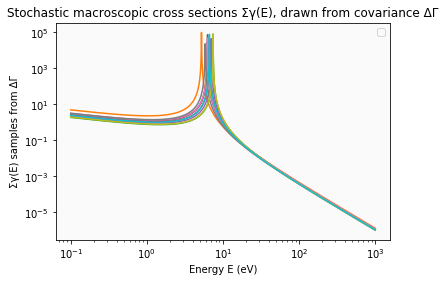

In [12]:
## Plot the cross sections from nuclear data uncertainty
titre_ΔΣ = 'Stochastic macroscopic cross sections Σγ(E), drawn from covariance ΔΓ'
titre_ΔΣ_pdf = "%s.%s"%(titre_ΔΣ, 'pdf')

#plt.close('all')
# Plotting the sampled cross sections
for i in range(10):
    Γ_sample = sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238)
    plt.loglog(E_g , np.array([evaluate_Σγ(E_g[g], Γ_sample) for g in range(E_g.size)])) #, '--r') 
plt.ylabel('Σγ(E) samples from ΔΓ')
plt.xlabel('Energy E (eV)')
plt.title(titre_ΔΣ )
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

E_0 = 1.589282865622978


Text(0.5,1,'Σmeanγ(E_0) = 1.0479286351071893, meanΣγ(E_0) = 1.1190701071540887, Σγ_sigma_at_E0 = 0.32240989069703835, strd_dev_Σγ = 0.3835334581587881')

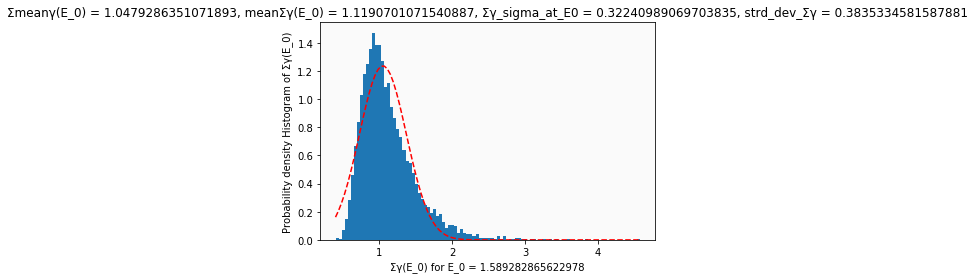

In [13]:
# the sampled data
n_samples = 10000
E_0 = E_g[300]
print("E_0 =", E_0 )
Σγ_hist = np.array([evaluate_Σγ(E_0, sample_Γ_res_parameters(μ_Γ_U238, cov_Γ_U238))  for i in range(n_samples)])
mean_Σγ = np.sum(Σγ_hist)/n_samples
strd_dev_Σγ = (np.dot(Σγ_hist - mean_Σγ,Σγ_hist - mean_Σγ)/(n_samples-1))**0.5
fig, ax = plt.subplots()
# the histogram of the data
num_bins = 100
n, bins, patches = ax.hist(Σγ_hist, num_bins, density=1)

# add a 1st order sensitivity line
Σγ_mean = evaluate_Σγ(E_0, μ_Γ_U238)
Σγ_sigma_at_E0 = (np.dot(dΣγ_dΓ(E_0, μ_Γ_U238), np.dot(cov_Γ_U238,dΣγ_dΓ(E_0, μ_Γ_U238))))**0.5
Σγ_local_propagation = (1 / (np.sqrt(2 * np.pi) * Σγ_sigma_at_E0)) * np.exp(-0.5 * (1 / Σγ_sigma_at_E0 * (bins - Σγ_mean))**2) # )**2

ax.plot(bins, Σγ_local_propagation, '--r', label='1st order snesitivity analysis')

ax.set_xlabel('Σγ(E_0) for E_0 = %s'%(E_0) )
ax.set_ylabel('Probability density Histogram of Σγ(E_0)')
ax.set_title(r'Σmeanγ(E_0) = %s, meanΣγ(E_0) = %s, Σγ_sigma_at_E0 = %s, strd_dev_Σγ = %s'%(Σγ_mean, mean_Σγ, Σγ_sigma_at_E0, strd_dev_Σγ))




> Here we observe 1-st order sensitivity propagation vs Monte Carlo: the blue histogram is the different cross section values from a Monte Carlo sampling the gaussian $\Gamma$ resonance parameters, while the red dotted line is the gaussian around the cross section taken at mean resonance parameters. 

In [14]:
MC_mean = sum(Σγ_hist)/Σγ_hist.size
MC_mean

1.1190701071540896

In [15]:
Σγ_mean

1.0479286351071893

In [16]:
rel_mean_XS_vs_XS_of_mean = (MC_mean - Σγ_mean)/Σγ_mean 
rel_mean_XS_vs_XS_of_mean

0.06788770691395749

> The discrepancy between the mean cross section over the UQ vs the cross section of the mean resonance parameters is of about 7%.

## Exact Multipole representation


> In our toy problem, we are able to calculate the exact (closed-form) of the pole representation, because we have less than 5 poles 

In [17]:
Π = exact_poles_and_residues(μ_Γ_U238)
Π

array([[ 2.58346704+4.68426723e-03j,  0.        -7.05686182e+02j],
       [-2.58346704-4.68426723e-03j,  0.        -7.05686182e+02j]])

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


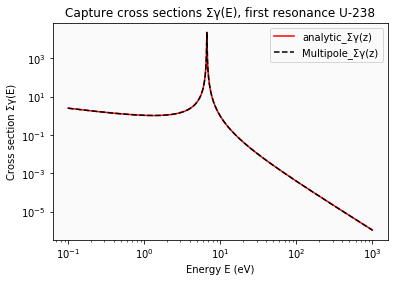

In [18]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(z_g**2 , np.array([analytic_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-r', label='analytic_Σγ(z)') 
plt.loglog(z_g**2 , np.array([multipole_Σ(z_g[g], Π) for g in range(z_g.size)]) , '--k', label='Multipole_Σγ(z)') 
plt.ylabel('Cross section Σγ(E)')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

## VF SLBW for mean poles and residues


> We here test the capacity of the vector fitting algorithm (home-made simplest version) to find the exact poles and residues.

Generate training points from the cross section

In [19]:
E_max_train = 10**5 # Minimum energy of the energy groups
E_min_train = 10**-3 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g_train = 10000 # Number of energy groups
x_train = np.logspace(np.log10(E_min_train),np.log10(E_max_train),N_g_train) # Energy groups (here log-spaced) for flux ψ
Y_train1 = np.array([x_train[g]**2 * z_space_Σγ(x_train[g], μ_Γ_U238) for g in range(x_train.size)]) #if you want


In [20]:
Y_train = np.transpose(np.array([Y_train1, Y_train1]))

VF algorithm results

In [21]:
VF_poles, VF_residues, VF_poly_coeff, VF_offset, VF_residual, barycentric_residues = VF_algorithm(x_train, Y_train, 100, 0, 4) ## add VF_poly_coeff when poly_order not zero 

The VF_algorithm was provided a number of poles to learn and is generating an initial guess
The training points are only along the real axis, and the initial guesses are generated accordingly with a shift


/Users/pabloducru/Etudes/MIT/Research/CODES/Pole Representation/Uncertainty-Methods-Toy-Problem/vector_fit.py:177: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  LS_vector, LS_residual, LS_rank , LS_singular_values = np.linalg.lstsq(LS_matrix, Y_LS_vector) ## np.linalg.solve(A.T.dot(A) + lamb * np.identity(n_col), A.T.dot(y)) For Tichonov


In [22]:
def Σγ_VF(z):
    return 1/z**2 * rational_function(z, VF_poles, VF_residues, VF_offset, VF_poly_coeff)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


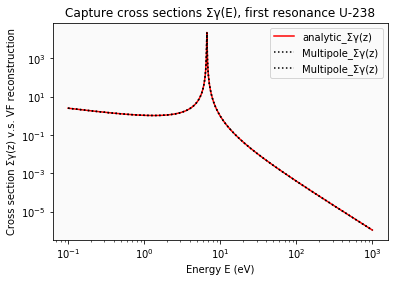

In [23]:
## Plot the mean cross section values. 
titre_Σ = 'Capture cross sections Σγ(E), first resonance U-238'
titre_Σ_pdf = "%s.%s"%(titre_Σ, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(z_g**2 , np.array([z_space_Σγ(z_g[g], μ_Γ_U238) for g in range(z_g.size)]) , '-r', label='analytic_Σγ(z)') 
plt.loglog(z_g**2 , np.array([Σγ_VF(z_g[g]) for g in range(z_g.size)]) , ':k', label='Multipole_Σγ(z)') 
plt.ylabel('Cross section Σγ(z) v.s. VF reconstruction')
plt.xlabel('Energy E (eV)')
plt.title(titre_Σ)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

In [24]:
plt.scatter(np.real(np.array([Π_tot[j][0] for j in range(Π_tot.shape[0])])), np.imag(np.array([Π_tot[j][0] for j in range(Π_tot.shape[0])])), s=300, color='r', marker='+',  label='exact poles')
plt.scatter(np.real(VF_poles), np.imag(VF_poles), s=300,  color='k', marker='x',label='VF poles')
plt.xlabel('Real[z] = +sqrt(E)')
plt.ylabel('Imaginary[z] = +sqrt(E) (eV)')
plt.title('Exact v/s VF residues')
plt.legend()

NameError: name 'Π_tot' is not defined

In [ ]:
plt.scatter(np.real(np.array([Π_tot[j][1]/2 for j in range(Π_tot.shape[0])])), np.imag(np.array([Π_tot[j][1]/2 for j in range(Π_tot.shape[0])])), s=300, color='r', marker='1',label='exact residues')
plt.scatter(np.real(VF_residues), np.imag(VF_residues), s=300,  color='k', marker='2', label='VF residues')
plt.xlabel('Real[z] = +sqrt(E)')
plt.ylabel('Imaginary[z] = +sqrt(E) (eV)')
plt.title('Exact v/s VF residues')
plt.legend()

> The Vector Fitting (VF) algorithm is better at reproducing the cross section than the poles (which is not surprizing, that is the way it is conceived). This could result in scale-up issues, and we thus need to test wetheath the contour integral method is robust to the exact location of the poles and exact values of the residues. 

## Contour Integrals


> We here code the functions required to perform Cauchy's Residue theorems contour integrals

**Key functions for contour integrals**

In [ ]:
def divide_by_z_pow_n(f,n):
    def z_pow_n(z):
        return f(z)/(z**n)
    return z_pow_n

In [ ]:
def multiply_by_z_min_p(f,p):
    def z_pow_n(z):
        return f(z)*(z-p)
    return z_pow_n

In [ ]:
def Cauchy_residues_extraction(f,p, N_contour = 10000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(2*np.pi*1j*(n/N_contour)))*np.exp(2*np.pi*1j*(n/N_contour))
    return contour_integral         

**Functions testing:**
In particular, the effect of the number of points to do the contour integral, and the distance addound the poles (which should be bigger than the accuracy we have on the position of the poles). 

In [ ]:
def f_flat(z):
    return np.array([1+1j, 1-1j])

In [ ]:
Cauchy_residues_extraction(f_flat, 1+1j)

In [ ]:
def rat1(z):
    return 10 + (1+1j)/(z-1) + (2+2*1j)/(z-1)**2

In [ ]:
Cauchy_residues_extraction(rat1, 1+1j)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 0)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(rat1,1), 2)

In [ ]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 0)

In [ ]:
Cauchy_residues_extraction(multiply_by_z_min_p(rat1,1), 1)

In [ ]:
def rat2(z):
    return np.array([(1+1j)/(1 - z), (1-1j)/(1j - z)])

In [ ]:
Cauchy_residues_extraction(rat2, 1+1j)

In [ ]:
Cauchy_residues_extraction(rat2, 1)

In [ ]:
Cauchy_residues_extraction(rat2, 1j)

> We observe that we loose half the digits in numerical precision when doing the contour integral by division by powers of z... This is independent of the number of points in the contour integral. It is linearly dependent inthe number of zeros in the epsilon of the contour integral. Unfortunately, this is inversely so than to the accuracy of the residues of the Cauchy residues theorem... We think 0.0001 or even perhaps 0.001 could be a good compromise, but 0.01 is probably too big.

In [ ]:
def z_z_square(z):
    return np.array([z/(z**2), (z**2)/z])

In [ ]:
Cauchy_residues_extraction(z_z_square, 1+1j)

In [ ]:
Cauchy_residues_extraction(z_z_square, 0)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(z_z_square,1), 0)

In [ ]:
Cauchy_residues_extraction(divide_by_z_pow_n(z_z_square,2), 0)

In [ ]:
Cauchy_residues_extraction(multiply_by_z_min_p(z_z_square,1), 0)

**Searching for a way to cover the entire (E,+) sheet:** The computer will not do it, must be coded by hand...

> I could not find a way in Python to define the sheet on the Riemann surface of mapping $\pm \sqrt{ E - E_T}$. 
I tried many options, perhaps the most promissing one using parity. 


In [ ]:
def sqrt_vs_pole(z):
    return np.array([(1+1j)/(z), (1-1j)/(z**(0.5))])

In [ ]:
def sqrt_vs_pole2(z):
    return np.array([((1+1j)*z**(0.5))/(z), (1-1j)/(z**(0.5)*(z-2))])

In [ ]:
Cauchy_residues_extraction(sqrt_vs_pole, 0)

In [ ]:
Cauchy_residues_extraction(sqrt_vs_pole2, 0)

In [ ]:
Cauchy_residues_extraction(sqrt_vs_pole2, 1)

In [ ]:
Cauchy_residues_extraction(sqrt_vs_pole2, 2)

In [ ]:
(1-1j)/2**0.5

In [ ]:
(1j)**0.5

In [ ]:
(-1j)**0.5

In [ ]:
def f_test(z):
    return z**0.5 + z 

In [ ]:
def f_test_branch2(z):
    return -z**0.5 + z 

In [ ]:
z_test = 1+ 1j

In [ ]:
z_test**0.5

In [ ]:
(-z_test)**0.5

In [ ]:
1j*(-z_test)**0.5

In [ ]:
f_test(z_test)

In [ ]:
f_test_branch2(z_test)

In [ ]:
def f_pair(f,z):
    return (f(z)+f(-z))/2
def f_odd(f,z):
    return (f(z)-f(-z))/2

In [ ]:
f_pair(f_test,z_test) + f_odd(f_test,z_test) 

In [ ]:
f_pair(f_test,z_test**2) + f_odd(f_test,z_test**2) 

In [ ]:
1j*f_pair(f_test,1j*z_test) + 1j*f_odd(f_test,1j*z_test) 

In [ ]:
np.conj(f_pair(f_test,np.conj(z_test))) - np.conj(f_odd(f_test,np.conj(z_test))) 

In [ ]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 100000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (2*ε/N_contour)*f(p+ε*np.exp(4*np.pi*1j*(n/N_contour)))*np.exp(4*np.pi*1j*(n/N_contour))
    return contour_integral/2

In [ ]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

In [ ]:
np.angle((1-1j)**(0.5))

In [ ]:
np.angle(np.exp(3*np.pi*1j))

In [ ]:
def Cauchy_residues_extraction_2_turns(f,p, N_contour = 10000 , ε = 0.001):
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour)) \
                             - (ε/N_contour)*f(p+ε*np.exp(np.pi*1j + np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             - (ε/N_contour)*f(p-ε*np.exp(-np.pi*1j*(n/N_contour)))*np.exp(-np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f(p-ε*np.exp(np.pi*1j -np.pi*1j*(n/N_contour)))*np.exp(-np.pi*1j*(n/N_contour))  
    return contour_integral/4

In [ ]:
Cauchy_residues_extraction_2_turns(sqrt_vs_pole, 0)

In [ ]:
## Cauchy Residues Theorem
def Cauchy_residues_extraction_pair_approach(f,p, N_contour = 10000 , ε = 0.00001):
    def f_pair(z):
        return (f(z)+f(-z))/2
    def f_odd(z):
        return (f(z)-f(-z))/2
    contour_integral = f(p+ε)*complex(0.0)
    for n in range(N_contour):
           contour_integral += (ε/N_contour)*f_pair(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour)) \
                             + (ε/N_contour)*f_pair(p-ε*np.exp(np.pi*1j - np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f_odd(p+ε*np.exp(np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  \
                             + (ε/N_contour)*f_odd(p-ε*np.exp(np.pi*1j -np.pi*1j*(n/N_contour)))*np.exp(np.pi*1j*(n/N_contour))  
    return contour_integral/4

In [ ]:
Cauchy_residues_extraction_pair_approach(sqrt_vs_pole, 0)

In [ ]:
import cmath

In [ ]:
cmath.sqrt(cmath.exp(2*cmath.pi*1j))

In [ ]:
cmath.polar(cmath.exp(2*cmath.pi*1j))

In [ ]:
cmath.polar(cmath.exp(4*cmath.pi*1j))

In [ ]:
cmath.sqrt(cmath.exp(4*cmath.pi*1j))

## Sensitivities by Contour Integrals

> We here test the capability of the contour integrals method to produce the correct cross section sensitivities

Need single entry funtions to run them in the contour integral functions

In [ ]:
def Σγ_z(z):
    return analytic_Σγ(z, μ_Γ_U238)

In [ ]:
def dΣγ_dΓ_complex(z): ## The most simple SLBW caputre resonance
    return analytic_dΣγ_dΓ(z, μ_Γ_U238)

In [ ]:
# Energy grid structure
E_max = 10**4 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5
## Plot the mean cross section values. 
plot_title = 'Partial derivatives of Σγ(E) with respect to Γ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238) for g in range(E_g.size)])) , '-.b', label='δΣγ/δΓ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238) for g in range(E_g.size)])) , ':k', label='δΣγ/δΓ(z)') 
plt.loglog(z_g**2 , np.abs(np.array([ dΣγ_dΓ_complex(z_g[g]) for g in range(E_g.size)])) , ':r', label='complex_δΣγ/δΓ(z)') 
plt.ylabel('δΣγ/δΓ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

the differentials for all resonance parameters for all poles and all resiudes.

In [ ]:
dr_dΓ = np.array([ 2*Π[j][0]**2*Cauchy_residues_extraction(dΣγ_dΓ_complex,Π[j][0]) for j in range(Π.shape[0])])

dp_dΓ = np.array([ 2*Π[j][0]**2/Π[j][1]*Cauchy_residues_extraction(multiply_by_z_min_p(dΣγ_dΓ_complex,Π[j][0]),Π[j][0]) for j in range(Π.shape[0])])

In [ ]:
dΣγ_dΓ_complex(1) 

In [ ]:
dp_dΓ.shape

`dp_dΓ[j][i]`  j pole i resonance parameter

> We here validate that the contour integral method got the correct derivatives of poles and residues

In [ ]:
Π

**Testing poles:** compare analytic poles derivatives to contour integral ones

In [ ]:
polesMP = np.array([Π[j][0] for j in range(Π.shape[0])])
polesMP

In [ ]:
dp_dΓ

In [ ]:
np.transpose(dp_dΓ)[0]

In [ ]:
1/(2*polesMP) 

In [ ]:
np.transpose(dp_dΓ)[0] - 1/(2*polesMP) 

In [ ]:
np.transpose(dp_dΓ)[2] + 1j/(2*polesMP) 

**Testing residues:** testing analytic residues derivaties with numerical contour integration

In [ ]:
dr_dΓ

In [ ]:
resMP = np.array([Π[j][1] for j in range(Π.shape[0])])
resMP

In [ ]:
np.transpose(dr_dΓ)[0] + resMP/(2*μ_Γ_U238[0]**0.5) 

In [ ]:
μ_Γ_U238

In [ ]:
dr_dΓ - 1/(2*resMP) 

> validated: we find the correct sensitivities of poles and residues

In [ ]:
# Energy grid structure
E_max = 10**6 # Minimum energy of the energy groups
E_min = 10**-1 # Maximum energy of the energy groups & the cutoff energy of the fision spectrum
N_g = 10000 # Number of energy groups
E_g = np.logspace(np.log10(E_min),np.log10(E_max),N_g) # Energy groups (here log-spaced) for flux ψ
z_g = E_g**0.5
## Plot the mean cross section values. 
plot_title = 'Partial derivative of Σγ(E) with respect to Eλ'
plot_title_pdf = "%s.%s"%(plot_title, 'pdf')

#plt.close('all')
# Plotting the cross section
#plt.loglog(E_g , np.array([sum(list(Σ_vector(E_g[g], μ_Γ_all))) for g in range(E_g.size)]) )
plt.loglog(E_g , np.abs(np.array([(evaluate_Σγ(E_g[g], Γ_U238_ε_E0) - evaluate_Σγ(E_g[g], μ_Γ_U238) )/ε for g in range(E_g.size)])) , '-r', label='(Σγ(E,Eλ + ε) - Σγ(E,Eλ) )/ε ') 
plt.loglog(E_g , np.abs(np.array([ dΣγ_dΓ(E_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , '-.b', label='δΣγ/δEλ(E)') 
plt.loglog(z_g**2 , np.abs(np.array([ analytic_dΣγ_dΓ(z_g[g], μ_Γ_U238)[0] for g in range(E_g.size)])) , ':k', label='δΣγ/δEλ(z)') 
plt.loglog(z_g**2 , np.abs(np.array([ multipole_dΣ_dΓ(z_g[g], Π, dp_dΓ, dr_dΓ ) for g in range(E_g.size)])) , '--g', label='MP_contour_δΣγ/δEλ(z)') 
plt.ylabel('δΣγ/δEλ(E)')
plt.xlabel('Energy E (eV)')
plt.title(plot_title)
plt.legend()

plt.rcParams['axes.facecolor'] = '0.98'

This is probably a bug. 
But it could be due to the Real part, which breaks the analytic properties. Must use the explicit version with the complex conjugates or look carefully how to compute this. It is not obvious. 